In [518]:
#######################################################
#                                                     #
#                IMPORT KNIHOVEN A DAT                #
#                                                     #
#######################################################

In [519]:
# Knihovny pro manipulaci s daty
import pandas as pd
import numpy as np

# Algoritmy pro predikci
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Algoritmus pro rozdělení dat na trénovací a testovací
from sklearn.model_selection import train_test_split

# Import metrik pro vyhodnocení přesnosti
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Knihovny pro vizualizaci
import matplotlib.pyplot as plt
%matplotlib inline

In [520]:
# Načtení dat do dataframů
df_availability = pd.read_csv('dostupnost.csv')
df_performance = pd.read_csv('vykon.csv')
df_quality = pd.read_csv('kvalita.csv')

In [521]:
# Ukázka načtených dat pro jednotlivé dataframy
df_availability

,id_procesu,id_smeny,planovana_delka_procesu(s),typ_smeny,operator_zam_cislo,planovany_pocet_priprav,planovany_cas_priprav_a_nastaveni(s),procenta_zasob,index_slozitosti_vyrobku,typ_vyrobku,pocet_servisu,planovana_delka_servisu(s),planovana_dostupnost,skutecna_dostupnost,skutecne_zpozdeni_predchozich_procesu_smeny(s),posleni_proces_smeny
0,1,1,7200,ranni,736,3,1500,82,5,A,1,1200,4500,4355.0,0.0,0
1,2,1,10800,ranni,736,1,900,82,10,B,0,0,9900,9880.0,235.0,0
2,3,1,10800,ranni,736,2,1200,82,25,A,0,0,9600,8720.0,552.0,1
3,4,2,8400,odpoledni,968,1,900,79,31,C,0,0,7500,7255.0,0.0,0
4,5,2,20400,odpoledni,968,2,1200,79,10,D,0,0,19200,17922.0,470.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,854,316,28800,odpoledni,668,2,1200,6,12,D,0,0,27600,26456.0,0.0,1
854,855,317,2400,ranni,661,1,900,6,10,B,0,0,1500,1480.0,0.0,0
855,856,317,8400,ranni,661,1,900,6,14,C,0,0,7500,7330.0,65.0,0
856,857,317,10800,ranni,661,1,900,6,6,D,0,0,9900,9682.0,235.0,0


In [522]:
# Ukázka načtených dat pro jednotlivé dataframy
df_performance

,id_procesu,id_smeny,planovana_delka_procesu(s),typ_smeny,operator_zam_cislo,index_slozitosti_vyrobku,typ_vyrobku,planovana_dostupnost(s),odhad_cycle_time(s),skutecny_cycle_time(s),planovany_pocet_ks,posleni_proces_smeny
0,1,1,7200,ranni,736,5,A,4500,20,20.400,225,0
1,2,1,10800,ranni,736,10,B,9900,15,15.450,660,0
2,3,1,10800,ranni,736,25,A,9600,30,29.640,320,1
3,4,2,8400,odpoledni,968,31,C,7500,60,61.800,125,0
4,5,2,20400,odpoledni,968,10,D,19200,12,11.400,1600,1
...,...,...,...,...,...,...,...,...,...,...,...,...
853,854,316,28800,odpoledni,668,12,D,27600,20,19.000,1380,1
854,855,317,2400,ranni,661,10,B,1500,12,12.360,125,0
855,856,317,8400,ranni,661,14,C,7500,12,12.000,625,0
856,857,317,10800,ranni,661,6,D,9900,20,20.000,495,0


In [523]:
# Ukázka načtených dat pro jednotlivé dataframy
df_quality

,id_procesu,id_smeny,planovana_delka_procesu(s),typ_smeny,operator_zam_cislo,planovany_pocet_priprav,index_slozitosti_vyrobku,typ_vyrobku,planovany_pocet_ks,pocet_vadnych_ks
0,1,1,7200,ranni,736,3,5,A,225,9
1,2,1,10800,ranni,736,1,10,B,660,5
2,3,1,10800,ranni,736,2,25,A,320,8
3,4,2,8400,odpoledni,968,1,31,C,125,7
4,5,2,20400,odpoledni,968,2,10,D,1600,8
...,...,...,...,...,...,...,...,...,...,...
853,854,316,28800,odpoledni,668,2,12,D,1380,8
854,855,317,2400,ranni,661,1,10,B,125,5
855,856,317,8400,ranni,661,1,14,C,625,4
856,857,317,10800,ranni,661,1,6,D,495,4


In [524]:
#######################################################
#                                                     #
#                PREDIKCE DOSTUPNOSTI                 #
#              (Výchozí hyperparametry)               #
#                                                     #
#######################################################

In [525]:
# Úprava dataframu df_availability

# Odebrání sloupců s ID smeny a ID procesu
df_availability = df_availability.drop('id_smeny', axis=1)
df_availability = df_availability.drop('id_procesu', axis=1)

# Enkódování smeny, operatora a typu vyrobku
df_enc_availability = pd.get_dummies(df_availability, columns=['typ_smeny','operator_zam_cislo', 'typ_vyrobku'])

# Ukázka enkódovaných dat
df_enc_availability

,planovana_delka_procesu(s),planovany_pocet_priprav,planovany_cas_priprav_a_nastaveni(s),procenta_zasob,index_slozitosti_vyrobku,pocet_servisu,planovana_delka_servisu(s),planovana_dostupnost,skutecna_dostupnost,skutecne_zpozdeni_predchozich_procesu_smeny(s),...,typ_smeny_odpoledni,typ_smeny_ranni,operator_zam_cislo_661,operator_zam_cislo_668,operator_zam_cislo_736,operator_zam_cislo_968,typ_vyrobku_A,typ_vyrobku_B,typ_vyrobku_C,typ_vyrobku_D
0,7200,3,1500,82,5,1,1200,4500,4355.0,0.0,...,False,True,False,False,True,False,True,False,False,False
1,10800,1,900,82,10,0,0,9900,9880.0,235.0,...,False,True,False,False,True,False,False,True,False,False
2,10800,2,1200,82,25,0,0,9600,8720.0,552.0,...,False,True,False,False,True,False,True,False,False,False
3,8400,1,900,79,31,0,0,7500,7255.0,0.0,...,True,False,False,False,False,True,False,False,True,False
4,20400,2,1200,79,10,0,0,19200,17922.0,470.0,...,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,28800,2,1200,6,12,0,0,27600,26456.0,0.0,...,True,False,False,True,False,False,False,False,False,True
854,2400,1,900,6,10,0,0,1500,1480.0,0.0,...,False,True,True,False,False,False,False,True,False,False
855,8400,1,900,6,14,0,0,7500,7330.0,65.0,...,False,True,True,False,False,False,False,False,True,False
856,10800,1,900,6,6,0,0,9900,9682.0,235.0,...,False,True,True,False,False,False,False,False,False,True


In [526]:
#Rozdělení (SPLIT) na vstupní a výstupní data (X, y)
X_a = df_enc_availability.drop(df_enc_availability.columns[8], axis=1)  # Drop pro 9. sloupec a vse ostatni do X
y_a = df_enc_availability.iloc[:,8:9]  # Drop pro vse krom 9. sloupce a ten do y

In [527]:
# Ukázka X datasetu (features)
X_a

,planovana_delka_procesu(s),planovany_pocet_priprav,planovany_cas_priprav_a_nastaveni(s),procenta_zasob,index_slozitosti_vyrobku,pocet_servisu,planovana_delka_servisu(s),planovana_dostupnost,skutecne_zpozdeni_predchozich_procesu_smeny(s),posleni_proces_smeny,typ_smeny_odpoledni,typ_smeny_ranni,operator_zam_cislo_661,operator_zam_cislo_668,operator_zam_cislo_736,operator_zam_cislo_968,typ_vyrobku_A,typ_vyrobku_B,typ_vyrobku_C,typ_vyrobku_D
0,7200,3,1500,82,5,1,1200,4500,0.0,0,False,True,False,False,True,False,True,False,False,False
1,10800,1,900,82,10,0,0,9900,235.0,0,False,True,False,False,True,False,False,True,False,False
2,10800,2,1200,82,25,0,0,9600,552.0,1,False,True,False,False,True,False,True,False,False,False
3,8400,1,900,79,31,0,0,7500,0.0,0,True,False,False,False,False,True,False,False,True,False
4,20400,2,1200,79,10,0,0,19200,470.0,1,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,28800,2,1200,6,12,0,0,27600,0.0,1,True,False,False,True,False,False,False,False,False,True
854,2400,1,900,6,10,0,0,1500,0.0,0,False,True,True,False,False,False,False,True,False,False
855,8400,1,900,6,14,0,0,7500,65.0,0,False,True,True,False,False,False,False,False,True,False
856,10800,1,900,6,6,0,0,9900,235.0,0,False,True,True,False,False,False,False,False,False,True


In [528]:
# Ukázka y datasetu (target)
y_a

,skutecna_dostupnost
0,4355.0
1,9880.0
2,8720.0
3,7255.0
4,17922.0
...,...
853,26456.0
854,1480.0
855,7330.0
856,9682.0


In [529]:
#Rozdělení (SPLIT) na trénovací a testovací data (Aktuálně 80 % dat trénink a 20 % dat test)
Xtrain_a, Xtest_a, Ytrain_a, Ytest_a = train_test_split(X_a,y_a, test_size = 0.20, random_state = 1)

In [530]:
#Vytvoření instancí s výchozími hyperparametry
modelLR = LinearRegression()
modelTR = DecisionTreeRegressor()
modelRF = RandomForestRegressor(random_state=1)
modelGR = GradientBoostingRegressor()

In [531]:
#Trénink modelů
modelLR.fit(Xtrain_a, Ytrain_a)
modelTR.fit(Xtrain_a, Ytrain_a)
modelRF.fit(Xtrain_a, np.array(Ytrain_a).ravel())
modelGR.fit(Xtrain_a, np.array(Ytrain_a).ravel())

GradientBoostingRegressor()

In [532]:
#Vytvoření predikcí jednotlivými algoritmy
YpredLR_a = modelLR.predict(Xtest_a)
YpredTR_a = modelTR.predict(Xtest_a)
YpredRF_a = modelRF.predict(Xtest_a)
YpredGR_a = modelGR.predict(Xtest_a)

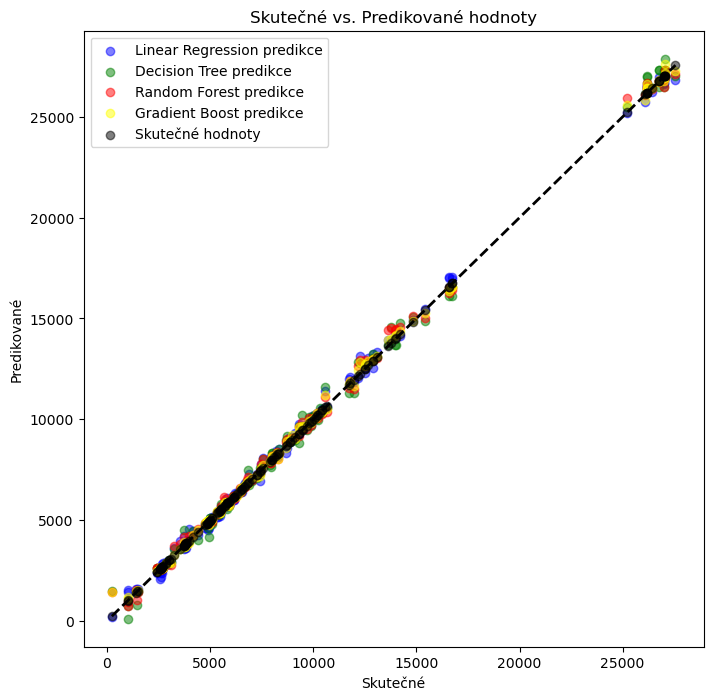

In [533]:
# Scatter plot pro všechny predikce
plt.figure(figsize=(8, 8))

plt.scatter(Ytest_a, YpredLR_a, alpha=0.5, color='blue', label='Linear Regression predikce')
plt.scatter(Ytest_a, YpredTR_a, alpha=0.5, color='green', label='Decision Tree predikce')
plt.scatter(Ytest_a, YpredRF_a, alpha=0.5, color='red', label='Random Forest predikce')
plt.scatter(Ytest_a, YpredGR_a, alpha=0.5, color='yellow', label='Gradient Boost predikce')
plt.scatter(Ytest_a, Ytest_a, alpha=0.5, color='black', label = 'Skutečné hodnoty')

plt.plot([Ytest_a.min(), Ytest_a.max()], [Ytest_a.min(), Ytest_a.max()], 'k--', lw=2)
plt.xlabel('Skutečné')
plt.ylabel('Predikované')
plt.title('Skutečné vs. Predikované hodnoty')
plt.legend()
plt.show()

In [534]:
#Výpis MAE pro predikci dostupnosti
print("MAE všech modelů (nižší = lepší) \n")
print("Linear Regressor MAE: \n" + str(mean_absolute_error(Ytest_a, YpredLR_a)) + "\n")
print("Decision Tree Regressor MAE: \n" + str(mean_absolute_error(Ytest_a, YpredTR_a)) + "\n")
print("Random Forest Regressor MAE: \n" + str(mean_absolute_error(Ytest_a, YpredRF_a)) + "\n")
print("Gradient Boost Regressor MAE: \n" + str(mean_absolute_error(Ytest_a, YpredGR_a)) + "\n")

MAE všech modelů (nižší = lepší) 

Linear Regressor MAE: 
177.89638937718362

Decision Tree Regressor MAE: 
203.86046511627907

Random Forest Regressor MAE: 
156.81680232558134

Gradient Boost Regressor MAE: 
107.8394665934145



In [535]:
#Výpis RMSE pro predikci dostupnosti
print("RMSE všech modelů (nižší = lepší) \n")
print("Linear Regressor RMSE: \n" + str(np.sqrt(mean_squared_error(Ytest_a, YpredLR_a))) + "\n")
print("Decision Tree Regressor RMSE: \n" + str(np.sqrt(mean_squared_error(Ytest_a, YpredTR_a))) + "\n")
print("Random Forest Regressor RMSE: \n" + str(np.sqrt(mean_squared_error(Ytest_a, YpredRF_a))) + "\n")
print("Gradient Boost Regressor RMSE: \n" + str(np.sqrt(mean_squared_error(Ytest_a, YpredGR_a))) + "\n")

RMSE všech modelů (nižší = lepší) 

Linear Regressor RMSE: 
236.89646776162664

Decision Tree Regressor RMSE: 
313.71880461982676

Random Forest Regressor RMSE: 
240.4568991197847

Gradient Boost Regressor RMSE: 
171.12169822288757



In [536]:
#Výpis R2 score pro predikci dostupnosti
print("R2 score všech modelů (bližší k 1 = lepší) \n")
print("Linear Regressor R2: \n" + str(r2_score(Ytest_a, YpredLR_a)) + "\n")
print("Decision Tree Regressor R2: \n" + str(r2_score(Ytest_a, YpredTR_a)) + "\n")
print("Random Forest Regressor R2: \n" + str(r2_score(Ytest_a, YpredRF_a)) + "\n")
print("Gradient Boost Regressor R2: \n" + str(r2_score(Ytest_a, YpredGR_a)) + "\n")

R2 score všech modelů (bližší k 1 = lepší) 

Linear Regressor R2: 
0.9988158804986526

Decision Tree Regressor R2: 
0.9979233683626331

Random Forest Regressor R2: 
0.9987800196163422

Gradient Boost Regressor R2: 
0.9993821422106146



In [537]:
#Výpis MAPE pro predikci dostupnosti
print("MAPE všech modelů (nižší = lepší) \n")
print("Linear Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_a, YpredLR_a)) + "\n")
print("Decision Tree Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_a, YpredTR_a)) + "\n")
print("Random Forest Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_a, YpredRF_a)) + "\n")
print("Gradient Boost Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_a, YpredGR_a)) + "\n")

MAPE všech modelů (nižší = lepší) 

Linear Regressor MAPE: 
0.03387087638671849

Decision Tree Regressor MAPE: 
0.06257277475770018

Random Forest Regressor MAPE: 
0.05264582081011988

Gradient Boost Regressor MAPE: 
0.04426857843917684



In [538]:
#######################################################
#                                                     #
#                 PREDIKCE VÝKONU                     #
#              (Výchozí hyperparametry)               #
#                                                     #
#######################################################

In [539]:
# Úprava dataframu df_performance

# Opětovný import kvůli debugování
df_performance = pd.read_csv('vykon.csv')

# Odebrání sloupců s ID smeny a ID procesu
df_performance = df_performance.drop('id_smeny', axis=1)
df_performance = df_performance.drop('id_procesu', axis=1)

# Enkódování typu smeny, operátora a typu výrobku
df_enc_performance = pd.get_dummies(df_performance, columns=['typ_smeny','operator_zam_cislo','typ_vyrobku'])

# Ukázka enkódovaných dat
df_enc_performance

,planovana_delka_procesu(s),index_slozitosti_vyrobku,planovana_dostupnost(s),odhad_cycle_time(s),skutecny_cycle_time(s),planovany_pocet_ks,posleni_proces_smeny,typ_smeny_odpoledni,typ_smeny_ranni,operator_zam_cislo_661,operator_zam_cislo_668,operator_zam_cislo_736,operator_zam_cislo_968,typ_vyrobku_A,typ_vyrobku_B,typ_vyrobku_C,typ_vyrobku_D
0,7200,5,4500,20,20.400,225,0,False,True,False,False,True,False,True,False,False,False
1,10800,10,9900,15,15.450,660,0,False,True,False,False,True,False,False,True,False,False
2,10800,25,9600,30,29.640,320,1,False,True,False,False,True,False,True,False,False,False
3,8400,31,7500,60,61.800,125,0,True,False,False,False,False,True,False,False,True,False
4,20400,10,19200,12,11.400,1600,1,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,28800,12,27600,20,19.000,1380,1,True,False,False,True,False,False,False,False,False,True
854,2400,10,1500,12,12.360,125,0,False,True,True,False,False,False,False,True,False,False
855,8400,14,7500,12,12.000,625,0,False,True,True,False,False,False,False,False,True,False
856,10800,6,9900,20,20.000,495,0,False,True,True,False,False,False,False,False,False,True


In [540]:
#Rozdělení (SPLIT) na vstupní a výstupní data (X, y)
X_p = df_enc_performance.drop(df_enc_performance.columns[4], axis=1)  # Drop pro 5. sloupec a vse ostatni do X
y_p = df_enc_performance.iloc[:,4:5]  # Drop pro vse krom 5. sloupce a ten do y

In [541]:
# Ukázka X datasetu (features)
X_p

,planovana_delka_procesu(s),index_slozitosti_vyrobku,planovana_dostupnost(s),odhad_cycle_time(s),planovany_pocet_ks,posleni_proces_smeny,typ_smeny_odpoledni,typ_smeny_ranni,operator_zam_cislo_661,operator_zam_cislo_668,operator_zam_cislo_736,operator_zam_cislo_968,typ_vyrobku_A,typ_vyrobku_B,typ_vyrobku_C,typ_vyrobku_D
0,7200,5,4500,20,225,0,False,True,False,False,True,False,True,False,False,False
1,10800,10,9900,15,660,0,False,True,False,False,True,False,False,True,False,False
2,10800,25,9600,30,320,1,False,True,False,False,True,False,True,False,False,False
3,8400,31,7500,60,125,0,True,False,False,False,False,True,False,False,True,False
4,20400,10,19200,12,1600,1,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,28800,12,27600,20,1380,1,True,False,False,True,False,False,False,False,False,True
854,2400,10,1500,12,125,0,False,True,True,False,False,False,False,True,False,False
855,8400,14,7500,12,625,0,False,True,True,False,False,False,False,False,True,False
856,10800,6,9900,20,495,0,False,True,True,False,False,False,False,False,False,True


In [542]:
# Ukázka y datasetu (target)
y_p

,skutecny_cycle_time(s)
0,20.400
1,15.450
2,29.640
3,61.800
4,11.400
...,...
853,19.000
854,12.360
855,12.000
856,20.000


In [543]:
#Rozdělení (SPLIT) na trénovací a testovací data (Aktuálně 80 % dat trénink a 20 % dat test)
Xtrain_p, Xtest_p, Ytrain_p, Ytest_p = train_test_split(X_p,y_p, test_size = 0.20, random_state = 1)

In [544]:
#Vytvoření instancí s výchozími hyperparametry
modelLR_p = LinearRegression()
modelTR_p = DecisionTreeRegressor()
modelRF_p = RandomForestRegressor(random_state=1)
modelGR_p = GradientBoostingRegressor()

In [545]:
#Trénink modelů
modelLR_p.fit(Xtrain_p, Ytrain_p)
modelTR_p.fit(Xtrain_p, Ytrain_p)
modelRF_p.fit(Xtrain_p, np.array(Ytrain_p).ravel())
modelGR_p.fit(Xtrain_p, np.array(Ytrain_p).ravel())

GradientBoostingRegressor()

In [546]:
#Vytvoření predikcí jednotlivými algoritmy
YpredLR_p = modelLR_p.predict(Xtest_p)
YpredTR_p = modelTR_p.predict(Xtest_p)
YpredRF_p = modelRF_p.predict(Xtest_p)
YpredGR_p = modelGR_p.predict(Xtest_p)

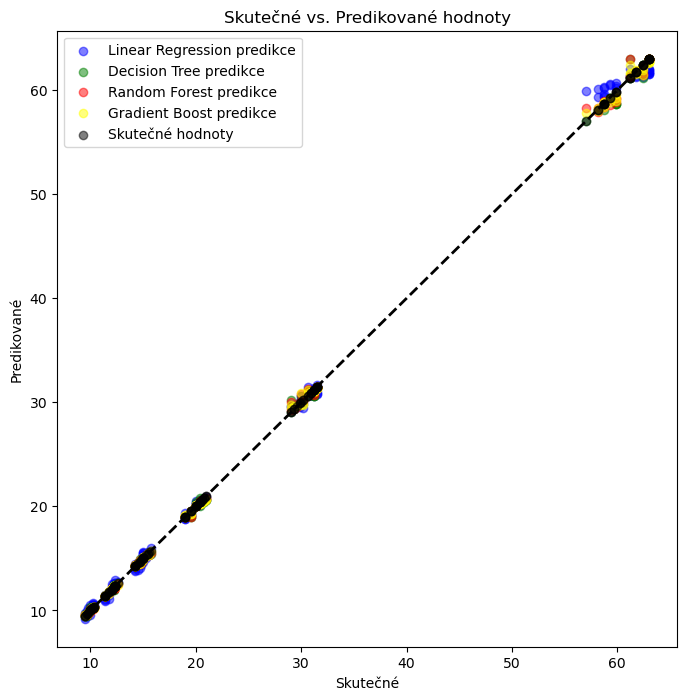

In [547]:
# Scatter plot pro všechny predikce
plt.figure(figsize=(8, 8))

plt.scatter(Ytest_p, YpredLR_p, alpha=0.5, color='blue', label='Linear Regression predikce')
plt.scatter(Ytest_p, YpredTR_p, alpha=0.5, color='green', label='Decision Tree predikce')
plt.scatter(Ytest_p, YpredRF_p, alpha=0.5, color='red', label='Random Forest predikce')
plt.scatter(Ytest_p, YpredGR_p, alpha=0.5, color='yellow', label='Gradient Boost predikce')
plt.scatter(Ytest_p, Ytest_p, alpha=0.5, color='black', label = 'Skutečné hodnoty')

plt.plot([Ytest_p.min(), Ytest_p.max()], [Ytest_p.min(), Ytest_p.max()], 'k--', lw=2)
plt.xlabel('Skutečné')
plt.ylabel('Predikované')
plt.title('Skutečné vs. Predikované hodnoty')
plt.legend()
plt.show()

In [548]:
#Výpis MAE
print("MAE všech modelů (nižší = lepší) \n")
print("Linear Regressor MAE: \n" + str(mean_absolute_error(Ytest_p, YpredLR_p)) + "\n")
print("Decision Tree Regressor MAE: \n" + str(mean_absolute_error(Ytest_p, YpredTR_p)) + "\n")
print("Random Forest Regressor MAE: \n" + str(mean_absolute_error(Ytest_p, YpredRF_p)) + "\n")
print("Gradient Boost Regressor MAE: \n" + str(mean_absolute_error(Ytest_p, YpredGR_p)) + "\n")

MAE všech modelů (nižší = lepší) 

Linear Regressor MAE: 
0.3832029693462369

Decision Tree Regressor MAE: 
0.10361918604651253

Random Forest Regressor MAE: 
0.12854529069767517

Gradient Boost Regressor MAE: 
0.1457374933405508



In [549]:
#Výpis RMSE
print("RMSE všech modelů (nižší = lepší) \n")
print("Linear Regressor RMSE: \n" + str(np.sqrt(mean_squared_error(Ytest_p, YpredLR_p))) + "\n")
print("Decision Tree Regressor RMSE: \n" + str(np.sqrt(mean_squared_error(Ytest_p, YpredTR_p))) + "\n")
print("Random Forest Regressor RMSE: \n" + str(np.sqrt(mean_squared_error(Ytest_p, YpredRF_p))) + "\n")
print("Gradient Boost Regressor RMSE: \n" + str(np.sqrt(mean_squared_error(Ytest_p, YpredGR_p))) + "\n")

RMSE všech modelů (nižší = lepší) 

Linear Regressor RMSE: 
0.5607834806954738

Decision Tree Regressor RMSE: 
0.2894306384554753

Random Forest Regressor RMSE: 
0.2730603950162927

Gradient Boost Regressor RMSE: 
0.23679680146166437



In [550]:
#Výpis R2 score
print("R2 score všech modelů (bližší k 1 = lepší) \n")
print("Linear Regressor R2: \n" + str(r2_score(Ytest_p, YpredLR_p)) + "\n")
print("Decision Tree Regressor R2: \n" + str(r2_score(Ytest_p, YpredTR_p)) + "\n")
print("Random Forest Regressor R2: \n" + str(r2_score(Ytest_p, YpredRF_p)) + "\n")
print("Gradient Boost Regressor R2: \n" + str(r2_score(Ytest_p, YpredGR_p)) + "\n")

R2 score všech modelů (bližší k 1 = lepší) 

Linear Regressor R2: 
0.9990527596667733

Decision Tree Regressor R2: 
0.9997476758822857

Random Forest Regressor R2: 
0.9997754116696884

Gradient Boost Regressor R2: 
0.9998311031998008



In [551]:
#Výpis MAPE
print("MAPE všech modelů (nižší = lepší) \n")
print("Linear Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_p, YpredLR_p)) + "\n")
print("Decision Tree Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_p, YpredTR_p)) + "\n")
print("Random Forest Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_p, YpredRF_p)) + "\n")
print("Gradient Boost Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_p, YpredGR_p)) + "\n")

MAPE všech modelů (nižší = lepší) 

Linear Regressor MAPE: 
0.0159659365776037

Decision Tree Regressor MAPE: 
0.0039028057859822247

Random Forest Regressor MAPE: 
0.0047179165561406135

Gradient Boost Regressor MAPE: 
0.005660734128972883



In [552]:
#######################################################
#                                                     #
#                 PREDIKCE KVALITY                    #
#              (Výchozí hyperparametry)               #
#                                                     #
#######################################################

In [553]:
# Úprava dataframu df_quality

#Opětovný import kvůli debugování
df_quality = pd.read_csv('kvalita.csv')

# Odebrání sloupců s ID smeny a ID procesu
df_quality = df_quality.drop('id_smeny', axis=1)
df_quality = df_quality.drop('id_procesu', axis=1)

# Enkódování typu smeny, operátora a typu výrobku
df_enc_quality = pd.get_dummies(df_quality, columns=['typ_smeny','operator_zam_cislo', 'typ_vyrobku'])

# Ukázka enkódovaných dat
df_enc_quality

,planovana_delka_procesu(s),planovany_pocet_priprav,index_slozitosti_vyrobku,planovany_pocet_ks,pocet_vadnych_ks,typ_smeny_odpoledni,typ_smeny_ranni,operator_zam_cislo_661,operator_zam_cislo_668,operator_zam_cislo_736,operator_zam_cislo_968,typ_vyrobku_A,typ_vyrobku_B,typ_vyrobku_C,typ_vyrobku_D
0,7200,3,5,225,9,False,True,False,False,True,False,True,False,False,False
1,10800,1,10,660,5,False,True,False,False,True,False,False,True,False,False
2,10800,2,25,320,8,False,True,False,False,True,False,True,False,False,False
3,8400,1,31,125,7,True,False,False,False,False,True,False,False,True,False
4,20400,2,10,1600,8,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,28800,2,12,1380,8,True,False,False,True,False,False,False,False,False,True
854,2400,1,10,125,5,False,True,True,False,False,False,False,True,False,False
855,8400,1,14,625,4,False,True,True,False,False,False,False,False,True,False
856,10800,1,6,495,4,False,True,True,False,False,False,False,False,False,True


In [554]:
#Rozdělení (SPLIT) na vstupní a výstupní data (X, y)
X_q = df_enc_quality.drop(df_enc_quality.columns[4], axis=1)  # Drop pro 5. sloupec a vse ostatni do X
y_q = df_enc_quality.iloc[:,4:5]  # Drop pro vse krom 5. sloupce a ten do y

In [555]:
# Ukázka X datasetu (features)
X_q

,planovana_delka_procesu(s),planovany_pocet_priprav,index_slozitosti_vyrobku,planovany_pocet_ks,typ_smeny_odpoledni,typ_smeny_ranni,operator_zam_cislo_661,operator_zam_cislo_668,operator_zam_cislo_736,operator_zam_cislo_968,typ_vyrobku_A,typ_vyrobku_B,typ_vyrobku_C,typ_vyrobku_D
0,7200,3,5,225,False,True,False,False,True,False,True,False,False,False
1,10800,1,10,660,False,True,False,False,True,False,False,True,False,False
2,10800,2,25,320,False,True,False,False,True,False,True,False,False,False
3,8400,1,31,125,True,False,False,False,False,True,False,False,True,False
4,20400,2,10,1600,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,28800,2,12,1380,True,False,False,True,False,False,False,False,False,True
854,2400,1,10,125,False,True,True,False,False,False,False,True,False,False
855,8400,1,14,625,False,True,True,False,False,False,False,False,True,False
856,10800,1,6,495,False,True,True,False,False,False,False,False,False,True


In [556]:
# Ukázka y datasetu (target)
y_q

,pocet_vadnych_ks
0,9
1,5
2,8
3,7
4,8
...,...
853,8
854,5
855,4
856,4


In [557]:
#Rozdělení (SPLIT) na trénovací a testovací data (Aktuálně 80 % dat trénink a 20 % dat test)
Xtrain_q, Xtest_q, Ytrain_q, Ytest_q = train_test_split(X_q,y_q, test_size = 0.20, random_state = 1)

In [558]:
#Vytvoření instancí s výchozími hyperparametry
modelLR_q = LinearRegression()
modelTR_q = DecisionTreeRegressor()
modelRF_q = RandomForestRegressor(random_state=1)
modelGR_q = GradientBoostingRegressor()

In [559]:
#Trénink modelů
modelLR_q.fit(Xtrain_q, Ytrain_q)
modelTR_q.fit(Xtrain_q, Ytrain_q)
modelRF_q.fit(Xtrain_q, np.array(Ytrain_q).ravel())
modelGR_q.fit(Xtrain_q, np.array(Ytrain_q).ravel())

GradientBoostingRegressor()

In [560]:
#Vytvoření predikcí jednotlivými algoritmy
YpredLR_q = modelLR_q.predict(Xtest_q)
YpredTR_q = modelTR_q.predict(Xtest_q)
YpredRF_q = modelRF_q.predict(Xtest_q)
YpredGR_q = modelGR_q.predict(Xtest_q)

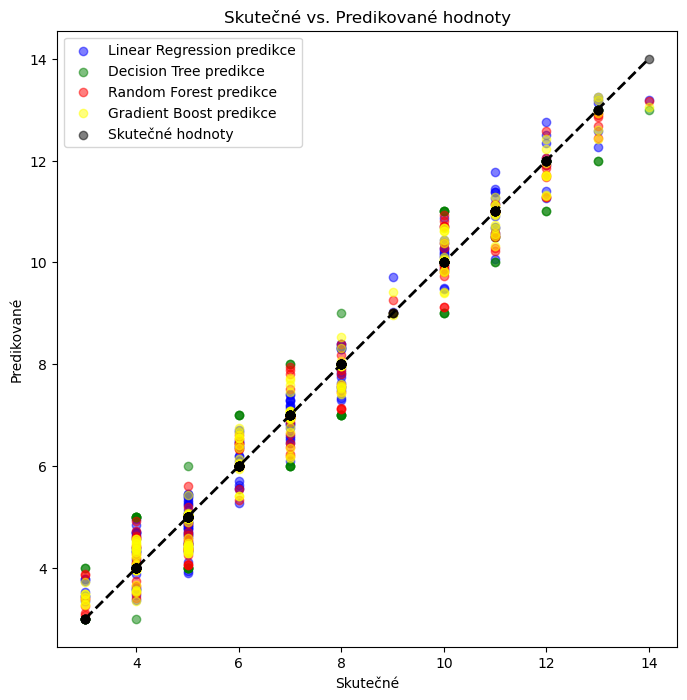

In [561]:
# Scatter plot pro všechny predikce
plt.figure(figsize=(8, 8))

plt.scatter(Ytest_q, YpredLR_q, alpha=0.5, color='blue', label='Linear Regression predikce')
plt.scatter(Ytest_q, YpredTR_q, alpha=0.5, color='green', label='Decision Tree predikce')
plt.scatter(Ytest_q, YpredRF_q, alpha=0.5, color='red', label='Random Forest predikce')
plt.scatter(Ytest_q, YpredGR_q, alpha=0.5, color='yellow', label='Gradient Boost predikce')
plt.scatter(Ytest_q, Ytest_q, alpha=0.5, color='black', label = 'Skutečné hodnoty')

plt.plot([Ytest_q.min(), Ytest_q.max()], [Ytest_q.min(), Ytest_q.max()], 'k--', lw=2)
plt.xlabel('Skutečné')
plt.ylabel('Predikované')
plt.title('Skutečné vs. Predikované hodnoty')
plt.legend()
plt.show()

In [562]:
#Výpis MAE
print("MAE všech modelů (nižší = lepší) \n")
print("Linear Regressor MAE: \n" + str(mean_absolute_error(Ytest_q, YpredLR_q)) + "\n")
print("Decision Tree Regressor MAE: \n" + str(mean_absolute_error(Ytest_q, YpredTR_q)) + "\n")
print("Random Forest Regressor MAE: \n" + str(mean_absolute_error(Ytest_q, YpredRF_q)) + "\n")
print("Gradient Boost Regressor MAE: \n" + str(mean_absolute_error(Ytest_q, YpredGR_q)) + "\n")

MAE všech modelů (nižší = lepší) 

Linear Regressor MAE: 
0.37149812777943375

Decision Tree Regressor MAE: 
0.26744186046511625

Random Forest Regressor MAE: 
0.28994462901439644

Gradient Boost Regressor MAE: 
0.295513641485391



In [563]:
#Výpis RMSE
print("RMSE všech modelů (nižší = lepší) \n")
print("Linear Regressor RMSE: \n" + str(np.sqrt(mean_squared_error(Ytest_q, YpredLR_q))) + "\n")
print("Decision Tree Regressor RMSE: \n" + str(np.sqrt(mean_squared_error(Ytest_q, YpredTR_q))) + "\n")
print("Random Forest Regressor RMSE: \n" + str(np.sqrt(mean_squared_error(Ytest_q, YpredRF_q))) + "\n")
print("Gradient Boost Regressor RMSE: \n" + str(np.sqrt(mean_squared_error(Ytest_q, YpredGR_q))) + "\n")

RMSE všech modelů (nižší = lepší) 

Linear Regressor RMSE: 
0.4443433657495077

Decision Tree Regressor RMSE: 
0.5143295477813133

Random Forest Regressor RMSE: 
0.42630314396042845

Gradient Boost Regressor RMSE: 
0.3922811358936106



In [564]:
#Výpis R2 score
print("R2 score všech modelů (bližší k 1 = lepší) \n")
print("Linear Regressor R2: \n" + str(r2_score(Ytest_q, YpredLR_q)) + "\n")
print("Decision Tree Regressor R2: \n" + str(r2_score(Ytest_q, YpredTR_q)) + "\n")
print("Random Forest Regressor R2: \n" + str(r2_score(Ytest_q, YpredRF_q)) + "\n")
print("Gradient Boost Regressor R2: \n" + str(r2_score(Ytest_q, YpredGR_q)) + "\n")

R2 score všech modelů (bližší k 1 = lepší) 

Linear Regressor R2: 
0.9739166949474555

Decision Tree Regressor R2: 
0.9650531392337233

Random Forest Regressor R2: 
0.97599165125316

Gradient Boost Regressor R2: 
0.9796708103077834



In [565]:
#Výpis MAPE
print("MAPE všech modelů (nižší = lepší) \n")
print("Linear Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_q, YpredLR_q)) + "\n")
print("Decision Tree Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_q, YpredTR_q)) + "\n")
print("Random Forest Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_q, YpredRF_q)) + "\n")
print("Gradient Boost Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_q, YpredGR_q)) + "\n")

MAPE všech modelů (nižší = lepší) 

Linear Regressor MAPE: 
0.0642038094500298

Decision Tree Regressor MAPE: 
0.04237487318882667

Random Forest Regressor MAPE: 
0.04801188507874555

Gradient Boost Regressor MAPE: 
0.050008023662436146

